## 0. Install all neccessary programms on Google Colab


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# !sudo apt install fastqc -qq
# !sudo apt install jellyfish -qq
# !sudo apt install spades -qq
# !sudo apt install barrnap 

############################ install QUAST ############################
# !wget https://downloads.sourceforge.net/project/quast/quast-5.0.2.tar.gz
# !tar -xzf quast-5.0.2.tar.gz
# %cd 'quast-5.0.2'
# !./setup.py install
# %cd ..
########################################################################

############################ install Prokka ############################
# !sudo apt-get install libdatetime-perl libxml-simple-perl libdigest-md5-perl git default-jre bioperl
# !sudo apt-get install parallel
# !sudo cpan Bio::Perly
# !git clone https://github.com/tseemann/prokka.git $HOME/prokka
# !$HOME/prokka/bin/prokka --setupdb

'''
в файле bin/prokka надо вручную поменять зависимости (MINVER) на "2.0" у следующих библиотек:
  'blastp' => {
    GETVER  => "blastp -version",
    REGEXP  => qr/blastp:\s+($BIDEC)/,
    MINVER  => "2.0",
    NEEDED  => 1,
  },
  'makeblastdb' => {
    GETVER  => "makeblastdb -version",
    REGEXP  => qr/makeblastdb:\s+($BIDEC)/,
    MINVER  => "2.0",
    NEEDED  => 0,  # only if --proteins used
  },
'''
########################################################################

############################ install Mauve ############################
# !wget http://darlinglab.org/mauve/snapshots/2015/2015-02-13/linux-x64/mauve_linux_snapshot_2015-02-13.tar.gz
# !tar -xzf mauve_linux_snapshot_2015-02-13.tar.gz
# %cd mauve_snapshot_2015-02-13
# !./setup.py install
# %cd ..

# and java (set environment variable)
# def install_java():
#   !apt-get install -y openjdk-17-jdk-headless -qq > /dev/null      #install openjdk
#   os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-17-openjdk-amd64"     #set environment variable
#   !java -version       #check java version
# install_java()
########################################################################

The following additional packages will be installed:
  libjellyfish-2.0-2
The following NEW packages will be installed:
  jellyfish libjellyfish-2.0-2
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 418 kB of archives.
After this operation, 808 kB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libjellyfish-2.0-2:amd64.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../libjellyfish-2.0-2_2.2.8-3build1_amd64.deb ...
Unpacking libjellyfish-2.0

'\nв файле bin/prokka надо вручную поменять зависимости (MINVER) на "2.0" у следующих библиотек:\n  \'blastp\' => {\n    GETVER  => "blastp -version",\n    REGEXP  => qr/blastp:\\s+($BIDEC)/,\n    MINVER  => "2.0",\n    NEEDED  => 1,\n  },\n  \'makeblastdb\' => {\n    GETVER  => "makeblastdb -version",\n    REGEXP  => qr/makeblastdb:\\s+($BIDEC)/,\n    MINVER  => "2.0",\n    NEEDED  => 0,  # only if --proteins used\n  },\n'

$~$

## **00. Data preparation**

In [ ]:
!mkdir raw_data

In [ ]:
# SRR292678 - paired end (forward and reverse)
!wget -c https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292678sub_S1_L001_R1_001.fastq.gz
!wget -c https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292678sub_S1_L001_R2_001.fastq.gz

# SRR292862 – mate pair (forward and reverse)
!wget -c https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292862_S2_L001_R1_001.fastq.gz
!wget -c https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292862_S2_L001_R2_001.fastq.gz

# SRR292770 – mate pair (forward and reverse)
!wget -c https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292770_S1_L001_R1_001.fastq.gz
!wget -c https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292770_S1_L001_R2_001.fastq.gz

--2021-11-19 00:48:24--  https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292678sub_S1_L001_R1_001.fastq.gz
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.249.139.38, 13.249.139.96, 13.249.139.27, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.249.139.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 425982530 (406M) [application/x-gzip]
Saving to: ‘SRR292678sub_S1_L001_R1_001.fastq.gz’

SRR292678sub_S1_L00 100%[===================>] 406.25M  12.5MB/s    in 33s     

2021-11-19 00:48:57 (12.5 MB/s) - ‘SRR292678sub_S1_L001_R1_001.fastq.gz’ saved [425982530/425982530]

--2021-11-19 00:48:57--  https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292678sub_S1_L001_R2_001.fastq.gz
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.249.139.38, 13.249.139.96, 13.249.139.27, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.249.139.38|:443... co

In [ ]:
!mv SRR292678sub_S1_L001_R1_001.fastq.gz raw_data/paired_end_470bp_fwd.fastq.gz
!mv SRR292678sub_S1_L001_R2_001.fastq.gz raw_data/paired_end_470bp_rev.fastq.gz

!mv SRR292862_S2_L001_R1_001.fastq.gz raw_data/mate_pair_2kb_fwd.fastq.gz
!mv SRR292862_S2_L001_R2_001.fastq.gz raw_data/mate_pair_2kb_rev.fastq.gz

!mv SRR292770_S1_L001_R1_001.fastq.gz raw_data/mate_pair_6kb_fwd.fastq.gz
!mv SRR292770_S1_L001_R2_001.fastq.gz raw_data/mate_pair_6kb_rev.fastq.gz


In [ ]:
# unpack
!gunzip raw_data/*.fastq.gz

$~$

## **1. Data inspection**


Оценим качество ридов и их количество.

In [ ]:
!mkdir 1_fastqc

In [ ]:
!fastqc -q raw_data/*.fastq -o 1_fastqc/

**Number of reads in each file:** <br>

|          file name           |   fwd   |   rev   |
|------------------------------|---------|---------|
| SRR292678 (paired_end_470bp) | 5499346 | 5499346 |
|   SRR292862 (mate_pair_2kb)  | 5102041 | 5102041 |
|   SRR292770 (mate_pair_6kb)  | 5102041 | 5102041 |

$~$

## **2. (optional, 1 extra credit). K-mer profile and genome size estimation**

For our purposes it’s OK to only analyze the paired-end library (SRR292678), and only forward file (because the results for them are almost same). <br>
Searching for k-mer with size = 31

In [ ]:
!mkdir 2_k-mer_count

In [ ]:
# -m, --mer-len=uint32                    *Length of mer
# -s, --size=uint64                       *Initial hash size (> avg ecoli genome size in our case)
# -C, --canonical                          Count both strand, canonical representation (false)
# -o, --output=string                      Output file (mer_counts.jf)


!jellyfish count -m 31 -C -s 6M raw_data/paired_end_470bp_fwd.fastq -o 2_k-mer_count/31mer_counts_fwd.jf

In [ ]:
# convert to .tsv
!jellyfish histo 2_k-mer_count/31mer_counts_fwd.jf > 2_k-mer_count/31mer_fwd_hist.tsv

# left col: a list of the bins (the number of times a k-mer occurs or its ‘depth’)
# right col: the count for the number of k-mers in the data that fit into that category

Небольшой питоновский код чтобы обработать результаты jellyfish count и построить графики:

In [ ]:
fwd = pd.read_csv('2_k-mer_count/31mer_fwd_hist.tsv', sep=' ', header=None)
fwd.columns = ['bins', 'count']

fwd.head()

,bins,count
0,1,6755622
1,2,266510
2,3,48557
3,4,18950
4,5,11926


Интерпретация графиков:
* X $-$ сколько раз 31-мер встречается в ридах
* Y(x) $-$ число разных 31-меров, которые встречаются в ридах x раз

In [ ]:
fwd[5:].plot(x='bins', y='count', style='.')

In [ ]:
fwd_count_max = fwd[5:]['count'].max()
fwd_max = fwd[fwd['count'] == fwd_count_max]

fwd_max

,bins,count
61,62,89747


#### **GENOME SIZE ANALYSIS**

$N = \frac{(M*L)}{(L-K+1)} = \frac{62 * 90}{90 - 31 + 1} = 93$

$Genome\_size = \frac{T}{N} = \frac{5499346}{93} \simeq 59132 $ b.p.

(N: Depth of coverage, M: Kmer peak, K: Kmer-size, L: avg read length T: Total bases)


Actual *E.Coli* genome size is about $4.64$ (Escherichia coli str. K-12 substr. MG1655) $-$ $5.5$ (Escherichia coli O157:H7 str. Sakai).

$~$

## **3. Assembling E. coli X genome from paired reads**

Первым делом мы запускаем сборку на paired_end файлах с размером вставки (расстояние между ридами в парах ридов / distance between reads within read-pairs) 470п.н. (файл SRR292678). Ожидаем, что сборка будет не слишком хороша, так как insert size маленький и сложно будет определять последовательность контигов для их объединения в скаффолды.

In [ ]:
!mkdir 3_spades

In [ ]:
# Verify that the software was installed correctly
# !spades --test

In [ ]:
# -1	<filename>	file with forward paired-end reads
# -2	<filename>	file with reverse paired-end reads
# -o	<output_dir>	directory to store all the resulting files (required)

!spades -1 raw_data/paired_end_470bp_fwd.fastq -2 raw_data/paired_end_470bp_rev.fastq -o 3_spades/

Command line: /usr/lib/spades/bin/spades.py	-1	/content/raw_data/paired_end_470bp_forw.fastq	-2	/content/raw_data/paired_end_470bp_rev.fastq	-o	/content/3_spades	

System information:
  SPAdes version: 3.11.1
  Python version: 2.7.17
  OS: Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic

Output dir: /content/3_spades
Mode: read error correction and assembling
Debug mode is turned OFF

Dataset parameters:
  Multi-cell mode (you should set '--sc' flag if input data was obtained with MDA (single-cell) technology or --meta flag if processing metagenomic dataset)
  Reads:
    Library number: 1, library type: paired-end
      orientation: fr
      left reads: ['/content/raw_data/paired_end_470bp_forw.fastq']
      right reads: ['/content/raw_data/paired_end_470bp_rev.fastq']
      interlaced reads: not specified
      single reads: not specified
Read error correction parameters:
  Iterations: 1
  PHRED offset will be auto-detected
  Corrected reads will be compressed (with gzip)
Assembly para

<br><br><hr>
Я делал работу в разные дни, и сохранял промежуточные результаты себе на Гугл Диск. Так что следующий кусок кода для меня :)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Заархивировать и скопировать на Гугл Диск
# !zip -r /content/3_spades.zip /content/3_spades
# !cp 3_spades.zip drive/MyDrive/Desktop/3_spades.zip

In [ ]:
# Вынуть с гугл диска и разархивировать
# !cp drive/MyDrive/Desktop/3_spades.zip 3_spades.zip
# !unzip 3_spades.zip -qq
# !cp -r content/3_spades 3_spades/

<hr>
<br><br>

Результаты [QUAST](http://cab.cc.spbu.ru/quast/):

Для файлов contigs.fasta и scaffolds.fasta (НАДО ЛИ ЗАПУСКАТЬ ДЛЯ ВТОРОГО ФАЙЛА?)

\# contigs (>= 500bp):	206 || 214 <br>
N50:	105346 ||	105346 <br>
L50:	15 || 15


Можно также получить отчёт используя консольный quast:

In [ ]:
!mkdir 3_quast_results
!quast-5.0.2/quast.py 3_spades/contigs.fasta -o 3_quast_results

$~$

## **3a. (Optional, 1 extra credit). Effect of read correction.**

SPAdes работает в два этапа: исправление ошибок и сборка.<br>
В папке 3_spades/corrected лежат исправленные риды.<br>
Посмотрим на профиль k-меров (аналогично пункту 2.), но для исправленных ридов.

In [ ]:
!mkdir 3a_k-mer_corrected

In [ ]:
# jellyfish count
# -m, --mer-len=uint32                    *Length of mer
# -s, --size=uint64                       *Initial hash size (> avg ecoli genome size in our case)
# -C, --canonical                          Count both strand, canonical representation (false)
# -o, --output=string                      Output file (mer_counts.jf)

!gunzip -k /content/3_spades/corrected/paired_end_470bp_fwd.00.0_0.cor.fastq.gz
!jellyfish count -m 31 -C -s 6M 3_spades/corrected/paired_end_470bp_fwd.00.0_0.cor.fastq \
-o 3a_k-mer_corrected/31mer_corrected_fwd.jf

<br>

Convert results of *jellyfish count* to .tsv:

In [ ]:
!jellyfish histo 3a_k-mer_corrected/31mer_corrected_fwd.jf > 3a_k-mer_corrected/31mer_fwd_hist.tsv

# left col: a list of the bins (the number of times a k-mer occurs or its ‘depth’)
# right col: the count for the number of k-mers in the data that fit into that category

<br>

Небольшой питоновский код чтобы обработать результаты jellyfish count и построить графики:

In [ ]:
# read data from files

fwd_corr = pd.read_csv('3a_k-mer_corrected/31mer_fwd_hist.tsv', sep=' ', header=None)
fwd_corr.columns = ['bins', 'count']

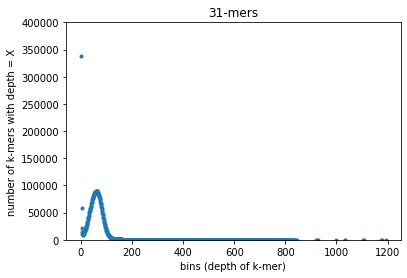

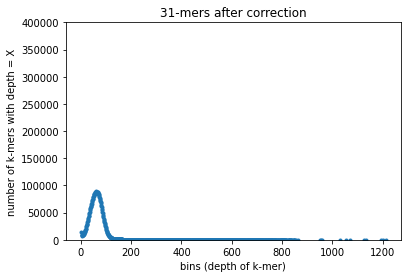

In [ ]:
# plot data

fwd.plot(x='bins', 
         y='count', 
         style='.', 
         ylim = (0, 0.4e6),
         title = '31-mers',
         xlabel = 'bins (depth of k-mer)',
         ylabel = 'number of k-mers with depth = X',
         legend = False)

fwd_corr.plot(x='bins', 
         y='count', 
         style='.', 
         ylim = (0, 0.4e6),
         title = '31-mers after correction',
         xlabel = 'bins (depth of k-mer)',
         ylabel = 'number of k-mers with depth = X',
         legend = False)

Как будто коррекция просто поправила первые три точки (????????????????????????????????????????????????)

$~$

## **4. Impact of reads with large insert size**

Теперь запустим SPAdes используя все три библиотеки ридов (SRR292678 as a paired ends,  SRR292862 and SRR292770 as a mate pairs).
У них разные insert sizes, и мы полагаем что это нам поможет, since the library with a small insert size can resolve short repeats, whereas the library with a larger insert size can resolve longer repeats. 

In [ ]:
!mkdir 4_spades3libs

In [ ]:
# -m/--memory	<int>	  	RAM limit for SPAdes in Gb (terminates if exceeded)
#				                [default: 250]
# --pe<#>-1	<filename>	file with forward reads for paired-end library number <#> (<#> = 1,2,..,9)
# --pe<#>-2	<filename>	file with reverse reads for paired-end library number <#> (<#> = 1,2,..,9)
# --mp<#>-1	<filename>	file with forward reads for mate-pair library number <#> (<#> = 1,2,..,9)
# --mp<#>-2	<filename>	file with reverse reads for mate-pair library number <#> (<#> = 1,2,..,9)
# -o	<output_dir>	    directory to store all the resulting files (required)

!spades \
--memory 11 \
--continue \\
--pe1-1 raw_data/paired_end_470bp_fwd.fastq --pe1-2 raw_data/paired_end_470bp_rev.fastq \
--mp2-1 raw_data/mate_pair_2kb_fwd.fastq --mp2-2 raw_data/mate_pair_2kb_rev.fastq \
--mp3-1 raw_data/mate_pair_6kb_fwd.fastq --mp3-2 raw_data/mate_pair_6kb_rev.fastq \
-o 4_spades3libs/


======= SPAdes pipeline continued. Log can be found here: /content/4_spades3libs/spades.log

Restored from Command line: /usr/lib/spades/bin/spades.py	--memory	11	--pe1-1	/content/raw_data/paired_end_470bp_fwd.fastq	--pe1-2	/content/raw_data/paired_end_470bp_rev.fastq	--mp2-1	/content/raw_data/mate_pair_2kb_fwd.fastq	--mp2-2	/content/raw_data/mate_pair_2kb_rev.fastq	--mp3-1	/content/raw_data/mate_pair_6kb_fwd.fastq	--mp3-2	/content/raw_data/mate_pair_6kb_rev.fastq	-o	/content/4_spades3libs

Command line: /usr/lib/spades/bin/spades.py	--memory	11	--pe1-1	/content/raw_data/paired_end_470bp_fwd.fastq	--pe1-2	/content/raw_data/paired_end_470bp_rev.fastq	--mp2-1	/content/raw_data/mate_pair_2kb_fwd.fastq	--mp2-2	/content/raw_data/mate_pair_2kb_rev.fastq	--mp3-1	/content/raw_data/mate_pair_6kb_fwd.fastq	--mp3-2	/content/raw_data/mate_pair_6kb_rev.fastq	-o	/content/4_spades3libs

System information:
  SPAdes version: 3.11.1
  Python version: 2.7.17
  OS: Linux-5.4.104+-x86_64-with-Ubuntu-18.0

<br><hr>

Удивительно, но 12Gb RAM на колабе не потянули сборку трёх библиотек. Поэтому воспользуемся precomputed results.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Вынуть с гугл диска и разархивировать
!cp 'drive/MyDrive/Desktop/ИБ2021/ИБ/Projects/Project3/three_libs_spades_out.zip' 4_spades3libs.zip
!unzip -j -qq 4_spades3libs.zip -d 4_spades3libs

<hr><br>


Результаты [QUAST](http://cab.cc.spbu.ru/quast/):

Для файлов contigs.fasta и scaffolds.fasta (НАДО ЛИ ЗАПУСКАТЬ ДЛЯ ВТОРОГО ФАЙЛА?)

\# contigs (>= 500bp):	105 || 90 <br>
N50:	335515 ||	2815616 <br>
L50:	6 || 1


Для отчёта: Несмотря на уменьшение общего числа контигов $\ge 500$bp (с $206$ до $105$), их длины заметно выросли, что видно по большему значению $N50$ метрики ($105346 \rightarrow 335515$), which means higher quality of three-library assemble.

$~$

## **5. Genome Annotation**

Мы секвенировали и собрали геном *E.coli* X. Теперь неоходимо его аннотировать при помощи **Prokka** на основе следующей идеи: сходные гены в разных организмах выполняют сходные функции.

**Prokka** находит в контигах предполагаемые гены, а затем при помощи BLAST ищет для каждого гена в базе данных RefSeq белок, который ген мог бы кодировать.

(**Prokka** identifies the coordinates of putative genes within contigs and then uses BLAST for similarity-based annotation using all proteins from sequenced bacterial genomes in the RefSeq database.)

In [ ]:
!mkdir 5_prokka_annotation

In [ ]:
# --outdir [X]       Output folder [auto] (default '')

!$HOME/prokka/bin/prokka --compliant --prefix scaffolds --force /content/4_spades3libs/scaffolds.fasta --outdir /content/5_prokka_annotation

[19:46:17] This is prokka 1.14.6
[19:46:17] Written by Torsten Seemann <torsten.seemann@gmail.com>
[19:46:17] Homepage is https://github.com/tseemann/prokka
[19:46:17] Local time is Mon Nov 15 19:46:17 2021
[19:46:17] You are not telling me who you are!
[19:46:17] Operating system is linux
[19:46:17] You have BioPerl 1.007002
[19:46:17] System has 2 cores.
[19:46:17] Option --cpu asked for 8 cores, but system only has 2
[19:46:17] Will use maximum of 2 cores.
[19:46:17] Annotating as >>> Bacteria <<<
[19:46:17] Generating locus_tag from '/content/4_spades3libs/scaffolds.fasta' contents.
[19:46:17] Setting --locustag IAEMKGFD from MD5 2ae640fd6def9ac6a7454ed12b9bdadd
[19:46:17] Enabling options to ensure Genbank/ENA/DDJB submission compliance.
[19:46:17] Re-using existing --outdir /content/5_prokka_annotation
[19:46:17] Using filename prefix: PROKKA_11152021.XXX
[19:46:17] Setting HMMER_NCPU=1
[19:46:17] Writing log to: /content/5_prokka_annotation/PROKKA_11152021.log
[19:46:17] Command

In [ ]:
!head /content/4_spades3libs/scaffolds.fasta

>NODE_1_length_2815616_cov_74.3819_ID_564387
GGTGCAGATGCTCGACCGGCTGGAAAGTGAAATCCTGGCTGACCGGGTGAGTGAGGAAAG
CCGCCGCTGGCTGGCATCGTGCGGCCTGACCGTGGAGCAGATGCAAAACCAGATGGACCC
GGTGTACACGCCGGCGCGAAAAATCCACCTGTACCACTGCGACCATCGCGGCCTGCCGCT
GGCGCTCATCAGCACGGAAGGGGCAACAGCGTGGTGCGCAGAATATGATGAATGGGGCAA
CCTGCTGAATGAAGAGAACCCGCATCAGCTGCAGCAGCTTATCCGGCTGCCGGGGCAGCA
GTATGATGAGGAGTCCGGCCTGTATTACAACCGCCACCGCTATTATGACCCGCTGCAGGG
GCGGTATATCACTCAGGATCCGATTGGGCTGAAGGGGGGATGGAATTTTTATCAGTATCC
GTTGAATCCGGTCATAAATGTAGATCCGCAAGGTTTGGTTGATATAAATTTATACCCCGA
AAGTGATCTTATCCATTCTGTAGCTGATGAGATTAATATCCCAGGCGTTTTCACAATCGG


$~$

## **6. Finding the closest relative of E. coli X**

Цель: найти известный геном, наиболее близкий к собранному нами геному *E.Coli* X.

Поиск производим по базе RefSeq при помощи BLAST по какому-нибудь консервативному гену  (в нашем случае выбрали 16S ribosomal RNA). Для этого, для начала, нам надо найти ген 16S RNA в файле собранного генома (using **barrnap**).

In [ ]:
!mkdir 6_closest_relative

Search and output found results in .fasta file:

In [ ]:
!barrnap /content/4_spades3libs/scaffolds.fasta > 6_closest_relative/rRNA_gene_prediction.gff

[20:55:10] This is barrnap 0.8
[20:55:10] Written by Torsten Seemann <torsten.seemann@gmail.com>
[20:55:10] Obtained from https://github.com/tseemann/barrnap
[20:55:10] Detected operating system: linux
[20:55:10] Adding /usr/bin/../binaries/linux to end of PATH
[20:55:10] Using HMMER binary: /usr/bin/nhmmer
[20:55:10] Will use 8 threads
[20:55:10] Setting evalue cutoff to 1e-06
[20:55:10] Will tag genes < 0.8 of expected length.
[20:55:10] Will reject genes < 0.5 of expected length.
[20:55:10] Using database: /usr/share/barrnap/db/bac.hmm
[20:55:10] Scanning /content/4_spades3libs/scaffolds.fasta for bac rRNA genes... please wait
[20:55:10] Command: /usr/bin/nhmmer --cpu 8 -E 1e-06 --w_length 3878  -o /dev/null --tblout /dev/stdout \/usr\/share\/barrnap\/db\/bac\.hmm \/content\/4_spades3libs\/scaffolds\.fasta
[20:55:12] Found: 16S_rRNA NODE_1_length_2815616_cov_74.3819_ID_564387 L=1538/1585 326359..327896 - 16S ribosomal RNA
[20:55:12] Found: 16S_rRNA NODE_1_length_2815616_cov_74.3819_

<br>

16s RNA is very important for bacteria, that's why it can have multiple copies of this gene (and that's why we got several matches).

Now, we have to extract all found for 16s rRNA sequences.

For that, we manually remove all extra lines from 'rRNA_gene_prediction.gff' file, and use **bedtools getfasta**.

In [ ]:
!bedtools getfasta -fi /content/4_spades3libs/scaffolds.fasta -bed /content/6_closest_relative/rRNA_gene_prediction.gff

index file /content/4_spades3libs/scaffolds.fasta.fai not found, generating...
>NODE_1_length_2815616_cov_74.3819_ID_564387:326358-327896
AAGGAGGTGATCCAACCGCAGGTTCCCCTACGGTTACCTTGTTACGACTTCACCCCAGTCATGAATCACAAAGTGGTAAGCGCCCTCCCGAAGGTTAAGCTACCTACTTCTTTTGCAACCCACTCCCATGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGTGGCATTCTGATCCACGATTACTAGCGATTCCGACTTCATGGAGTCGAGTTGCAGACTCCAATCCGGACTACGACGCACTTTATGAGGTCCGCTTGCTCTCGCGAGGTCGCTTCTCTTTGTATGCGCCATTGTAGCACGTGTGTAGCCCTGGTCGTAAGGGCCATGATGACTTGACGTCATCCCCACCTTCCTCCAGTTTATCACTGGCAGTCTCCTTTGAGTTCCCGGCCGGACCGCTGGCAACAAAGGATAAGGGTTGCGCTCGTTGCGGGACTTAACCCAACATTTCACAACACGAGCTGACGACAGCCATGCAGCACCTGTCTCACGGTTCCCGAAGGCACATTCTCATCTCTGAAAACTTCCGTGGATGTCAAGACCAGGTAAGGTTCTTCGCGTTGCATCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCATTTGAGTTTTAACCTTGCGGCCGTACTCCCCAGGCGGTCGACTTAACGCGTTAGCTCCGGAAGCCACGCCTCAAGGGCACAACCTCCAAGTCGACATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCACCTGAGCGTCAGTCTTCGTCCAGGGGGCCGCCTTCGCCACCGGTATTCCTCCAGATCTCTACGCATTTCACCGCTACACCTG

<br>

On the next step we use BLAST (http://blast.ncbi.nlm.nih.gov) to search for similar genome in the RefSeq db with the following **SEARCH PARAMETERS**:

* Nucleotide blast
* "RefSeq Genome Database" in "Database" field
* "Escherchia coli (taxid:562)" in "Organism" field
* Enter .fasta from the previous cell into the "Enter Query Sequence" field.
* "1900/01/01:2011/01/01[PDAT]" in "Entrez Query" field to search only among genomes that were present in the GenBank database at the beginning of 2011

<div>
<img src="https://thumbs.gfycat.com/GrimyEthicalAsianpiedstarling-size_restricted.gif" alt="searching" width = "100px"/>
</div>

$100\%$ identity found for "Escherichia coli 55989, complete sequence" (Sequence ID: [NC_011748.1](https://www.ncbi.nlm.nih.gov/nucleotide/NC_011748.1?report=genbank&log$=nuclalign&blast_rank=1&RID=T5JMACUF013)).

Save this sequence as "*55989.fasta*".

If no time limits are specified, then 


$~$

## **7. What is the genetic cause of HUS?**

Our reference belongs to an enteroaggregative *E.Coli* strain, harboring the pAA plasmid, which contains aggregative adherence fimbria (AAF) genes allowing bacteria to stick to cells in the intestine.

Fimbria on *E.Coli*:
<img src='https://upload.wikimedia.org/wikipedia/commons/d/d4/E._coli_fimbriae.png' height = '150'>

$2$ insertions were found in *E.Coli* X genome using **Muave** tool:

 gene  |           Product               |       position      | length |
-------|---------------------------------|---------------------|--------|
*stxA* | Shiga toxin subunit A precursor | $3483886 - 3484845$ |  $959$ |
*stxB* | Shiga toxin subunit B precursor | $3483605 - 3483874$ |  $269$ |

$~$

## **8. Tracing the source of toxin genes in E. coli X**

Делаем Zoom out и смотрим на аннотацию соседних генов. Видим, что там много мобильных элементов. Судя по всему, именно благодаря ним *E.Coli* X и преобрела additional DNA with virulence factors (shinga toxin precursors).


Phage integrases are enzymes that mediate unidirectional site-specific recombination between two DNA recognition sequences, the phage attachment site, attP, and the bacterial attachment site, attB.



<img src='https://psv4.userapi.com/c536132/u61105779/docs/d16/282f3ba9613d/Bez_Nazvania.png?extra=HxagZ1qWQrrbFDjz4r1NDxOXRoA6b8S-zlaIZS5l8TWTmdYYG6VKBZ1bovwgr90BXJzrT0UDsyM8v-KZGfHHH58XIMYAT6AWgJ2QwaH6aX2E5X3c10bTloMCfw8Rxp992b0zBj6YJdQ0kaxuDiHL4Q'>

$~$

## **9. Antibiotic resistance detection**

Checking resistance of reference (55989.fasta) *E.Coli* sequence and for assembled (scaffolds.fasta) *E.Coli* X sequence using [*ResFinder*](https://cge.cbs.dtu.dk/services/ResFinder/).

$\underline{Reference E.Coli}$ seems to be resistant only to tetracycline, whereas $\underline{E.Coli X}$ is resistant to a much wider range of antibiotics (cefepime, ampicillin, cefotaxime, ceftazidime from beta-lactam family, antibiotic tetracycline, and folate pathway antagonist antibiotics trimethoprim and sulfamethoxazole).

$~$

## **10. Antibiotic resistance mechanism**

Таким образом, при помощи горизонтального переноса генов (HGT) *E.Coli* X получил не только Shiga toxin genes, но и устойчивость к антибиотикам. 

class A beta lactamase (EC3.5.2.6) => TEM family 5199263 - 5200123

class A beta lactamase => CTX-M family  5195566 - 5196441

Class C beta lactamase => BlaEC family 4758802 - 4759935

Нашли 3 фермента, теперь надо почитать статьи о них и понять как они дают антибиотикорезистентность *E.Coli* X.

In [ ]:
# for (dirpath, dirnames, filenames) in os.walk('raw_data/'):
#   for filename in filenames:
#     if filename.endswith('.fastq'):
#       pass